In [1]:
exec(open("main.py").read(), globals())

Interpolation pour avoir une donnée toutes 15 min

In [2]:
def ajusteur(Shumidite):
    sh = Shumidite.signal
    sh15 = np.zeros(int(len(sh)*10.//15))
    sh15[::2] = sh[::3]
    sh15[1::2] = 0.5*(sh[1::3]+sh[2::3])
    Shumidite = Signal(sh15, a=Shumidite.a, b=Shumidite.b*1.5, nom=Shumidite.nom)
    return Shumidite

In [9]:
    def intercorrelation(radar, humidite):
#        s = self.signal
        print("Computation of the intercorralation")
        
        ## on tronque le signal le plus long pour avoir des signaux de même longueur
        #N = np.min([len(radar), len(humidite)])
        #radar = radar[:N]
        #humidite = humidite[:N]

        # on centre les signaux
        radar = radar - np.mean(radar)
        humidite = humidite - np.mean(humidite)

        fft_radar = np.fft.fft(radar)
        fft_humidite = np.fft.fft(humidite)

        fft_radar = fft_radar[:len(fft_radar)//2]
        fft_humidite = fft_humidite[:len(fft_humidite)//2]

    
        N = min([fft_radar.shape[0], fft_humidite.shape[0]])
  #      print("Le N de intercorrelation est ", N)

        s1 = fft_radar[:N:]
        s2 = fft_humidite[:N:]
            
        
        #if(N != s2.shape[0]):
       #     print("Both signal are not of the same length")
        C = np.zeros(N)
    
        counter = 0
        ProgressBar = None
        for t in range(N):
        
            #progression bar
            #---------------------------------------------------------------------------------------------------------
            counter += 1
            label = str(round(t/N *100,1)) + "%"
            if ProgressBar == None:
            #Si on a pas encore construit la barre
                ProgressBar = progressbar.ProgressBar(counter, N,fillingChar = 'x', label = label, usePercentage = False)
            else:
            #Si on a déjà construit la barre
                ProgressBar.updateProgress(counter, label)
            #---------------------------------------------------------------------------------------------------------
        
            s_trans = np.zeros(N)
            s_trans[:N-t:] = s1[t::]
            C[t] += sum(s2*s_trans)/(N-t)
        return C

In [12]:
def aff_intercorrelation(Sradar, Shumidite):
    radar = Sradar.signal
    humidite = Shumidite.signal
    T = np.linspace(Sradar.a,Sradar.b,len(radar))
    
    
    IC = intercorrelation(radar, humidite)
    
    N = len(IC)
    
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.title("Intercorrelation : radar & " + Shumidite.nom,fontsize=14,fontweight="bold")
    plt.xlabel("Time (d)",fontsize=13)
    plt.ylabel("Intercorrelation value",fontsize=13)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.plot(T[:N], IC) 
    
    plt.subplot(1,2,2)
    S_IC = Signal(IC, a=0, b=T[N-1], nom="Intercorrelation radar & " + Shumidite.nom)
    S_IC.analyse_signal(nb_peaks=10,window_type="rectangular",time_unit = "d", plot_an = "fft" , show = True)
#    fft_IC = np.fft.fft(IC)
#    plt.title("Spectrum of Intercorrelation radar & " + Shumidite.nom,fontsize=14,fontweight="bold")
#    plt.xlabel("Frequency (1/s)",fontsize=13)
#    plt.ylabel("Magnitude (dB)",fontsize=13)
#    plt.xticks(fontsize=13)
#    plt.yticks(fontsize=13)
#    plt.semilogy(fft_IC)  
    plt.show()
    return IC

Computation of the intercorralation
 [x                             ] 2.3%                                      

/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:50: ComplexWarning: Casting complex values to real discards the imaginary part


 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['0.03333963449904167' '10.401965963701' '10.535324501697167'
 '1.4336042834587917' '10.035229984211542' '1.900359166445375'
 '0.7668115934779585' '14.569420276081209' '14.502741007083126'
 '1.9670384354434582']


/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: divide by zero encountered in log10
/usr/local/insa/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:145: RuntimeWarning: divide by zero encountered in log10


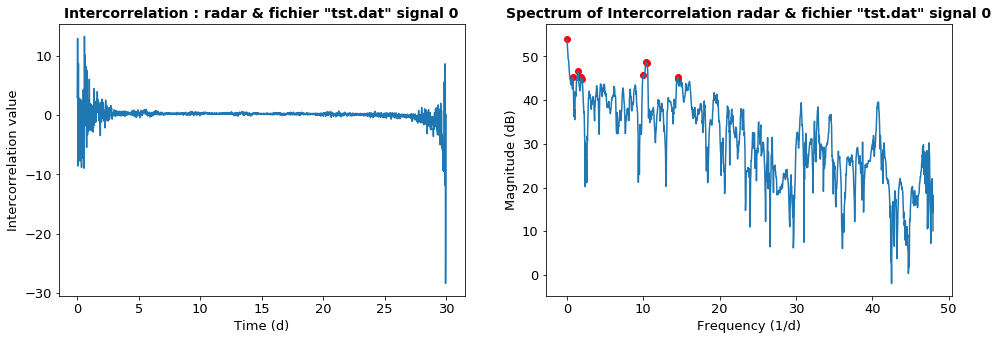






Computation of the intercorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['3.900737236387875' '3.967416505385958' '37.37373027342571'
 '37.2070321009305' '0.23337744149329165' '13.469212337612833'
 '37.14035283193242' '37.440409542423794' '14.936156255570666'
 '14.569420276081209']


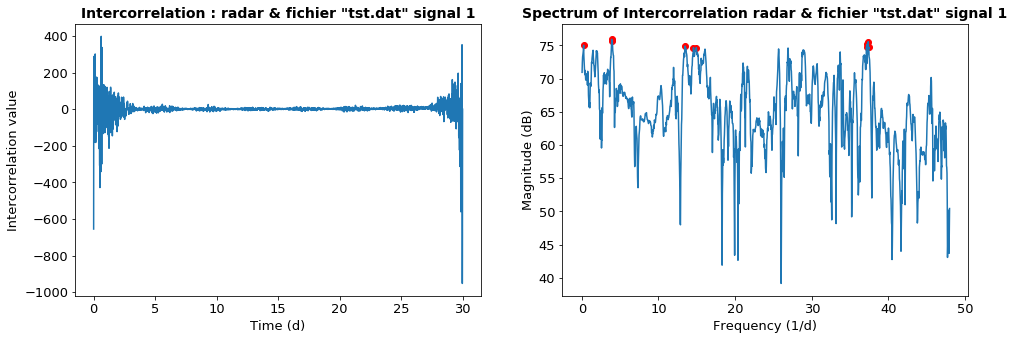






Computation of the intercorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['37.37373027342571' '37.2070321009305' '21.604083155379'
 '37.14035283193242' '37.440409542423794' '42.67473215877334'
 '42.74141142777142' '40.774372992327955' '38.040522963406545'
 '21.737441693375168']


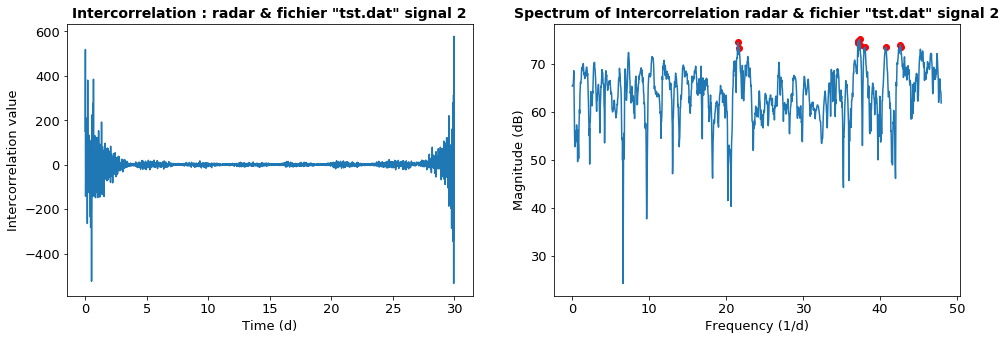






Computation of the intercorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['38.040522963406545' '37.97384369440846' '14.43606173808504'
 '14.369382469086958' '14.569420276081209' '15.069514793566833'
 '14.936156255570666' '16.069703828538085' '36.84029612144104'
 '36.74027721794392']


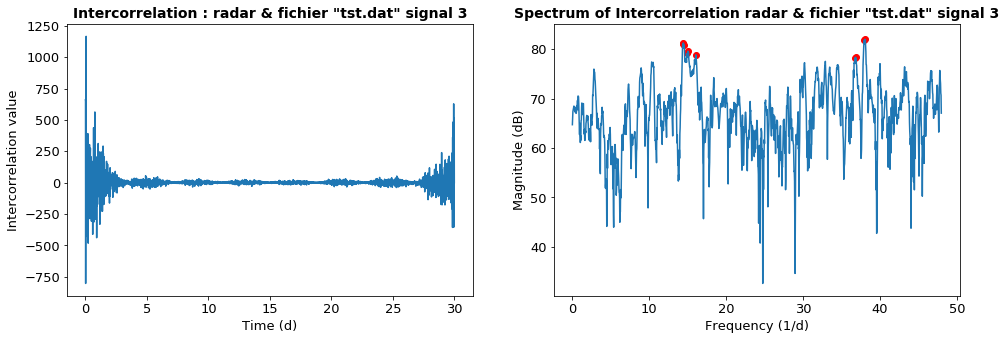






Computation of the intercorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['10.401965963701' '7.334719589789167' '10.068569618710583'
 '0.03333963449904167' '10.0018903497125' '6.167832382322709'
 '6.934643975800667' '21.604083155379' '8.301568990261375'
 '11.968928785155958']


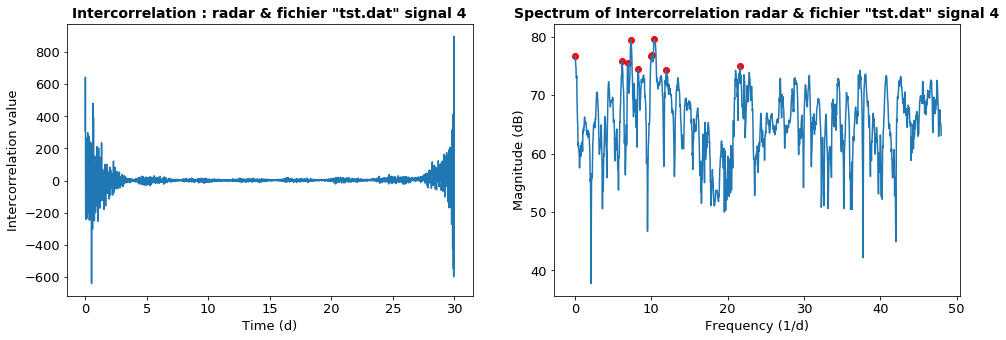






Computation of the intercorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['0.03333963449904167' '0.23337744149329165' '14.569420276081209'
 '14.936156255570666' '16.069703828538085' '14.502741007083126'
 '15.069514793566833' '14.836137352073541' '15.903005656042874'
 '13.469212337612833']


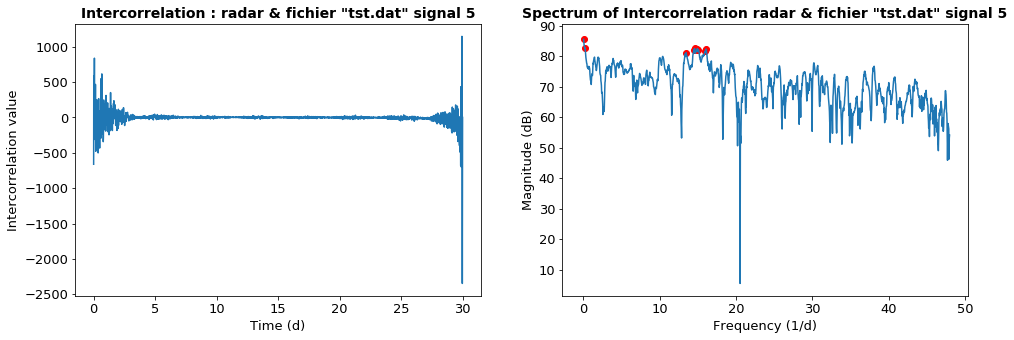






Computation of the intercorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['7.334719589789167' '10.401965963701' '10.501984867198125'
 '21.604083155379' '37.37373027342571' '6.901304341301626'
 '37.2070321009305' '37.14035283193242' '37.440409542423794'
 '21.504064251881875']







Computation of the intercorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['10.401965963701' '10.535324501697167' '8.968361680242207'
 '0.03333963449904167' '0.23337744149329165' '9.101720218238375'
 '7.334719589789167' '0.7668115934779585' '0.700132324479875'
 '38.040522963406545']







Computation of the intercorralation
 [xxxxxxxxxxxxxxxxxxxxxxxxxxxxxx] 100.0%                                    
Peaks : 
Fourrier Transform :  ['40.774372992327955' '40.707693723329875' '25.671518564262083'
 '45.27522364969859' '42.67473215877334' '42.74141142777142'
 '16.069703828538085' '0.03333963449904167' '45.57528036018996'
 '45.50860109119188']


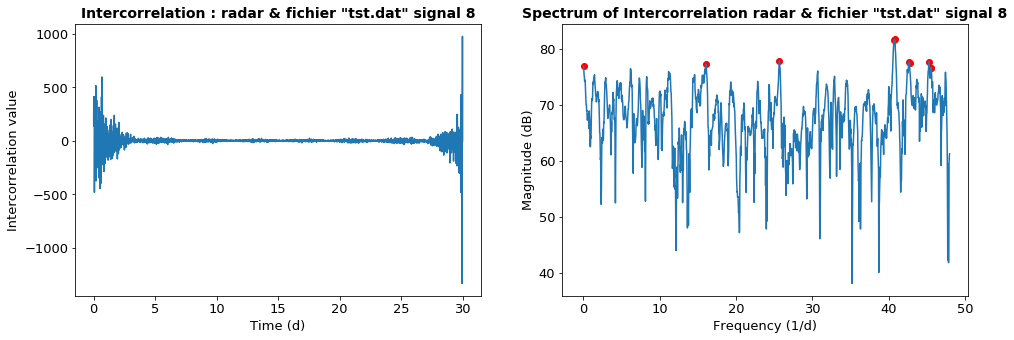

In [13]:
Sradar = signaux[4]
Tab_IC = []
for i in range(5, len(signaux)):
#for i in range(6, 7):
    Shumidite = ajusteur(signaux[i])
    Tab_IC += [aff_intercorrelation(Sradar, Shumidite)]
    print("\n\n")
               

# Analyse des signaux

In [16]:
Sradar.b

65.82291666666666

<Figure size 1080x432 with 0 Axes>

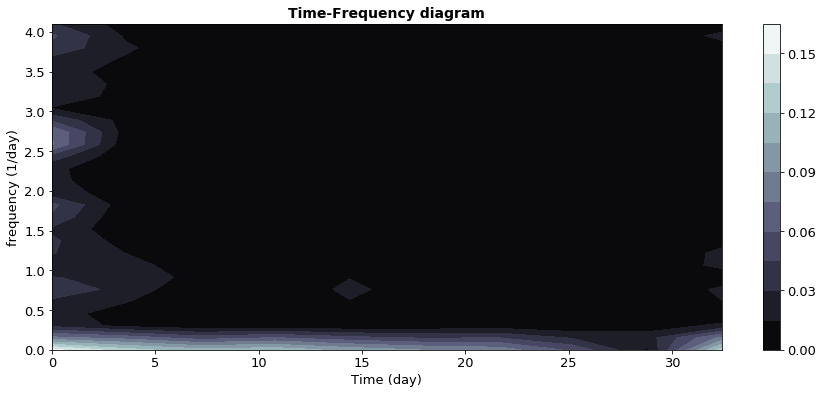

Most important frequencies : 
[ 0.87777602 11.84997626 23.69995252 35.54992879]


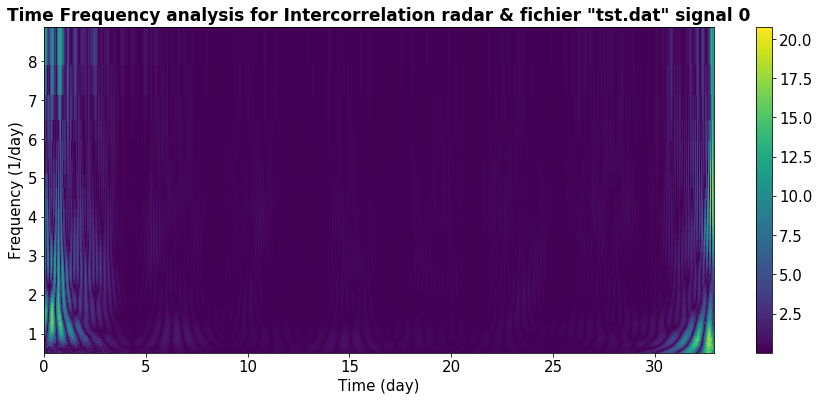

<Figure size 1080x432 with 0 Axes>

Most important frequencies : 
[ 0.78999842 14.21997151 35.54992879]


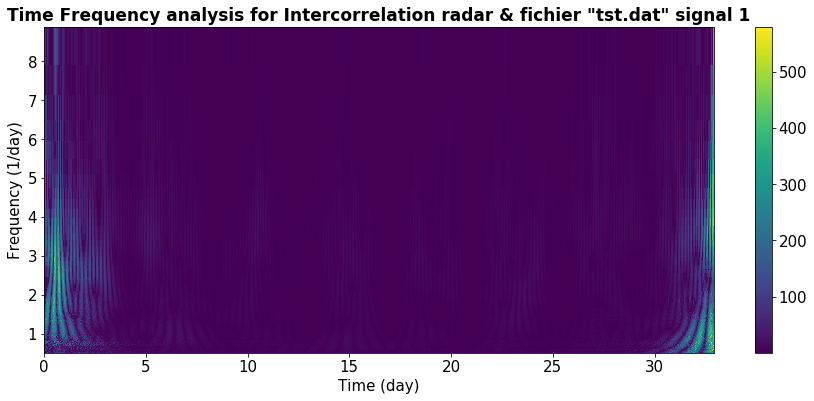

<Figure size 1080x432 with 0 Axes>

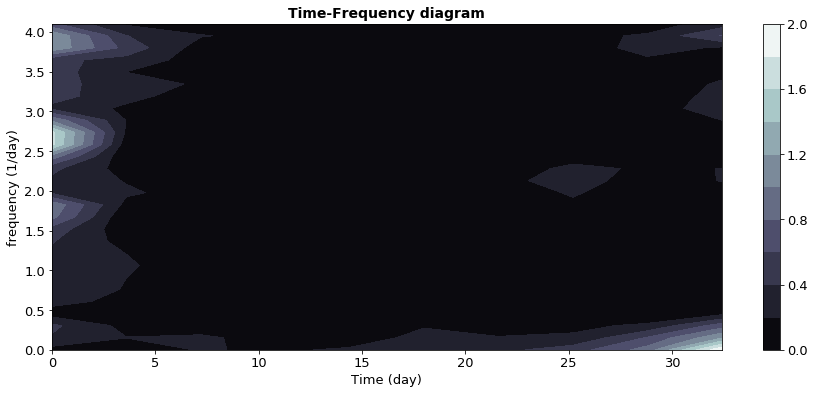

Most important frequencies : 
[ 0.5345854  11.84997626 35.54992879 23.69995252]


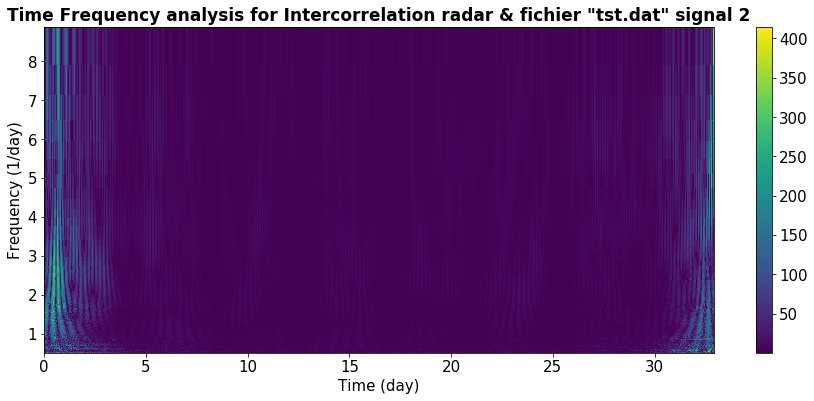

<Figure size 1080x432 with 0 Axes>

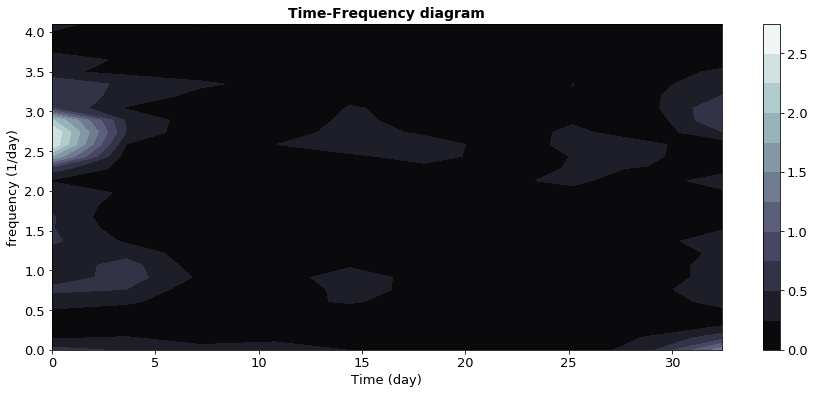

Most important frequencies : 
[ 0.66448465 14.21997151 35.54992879]


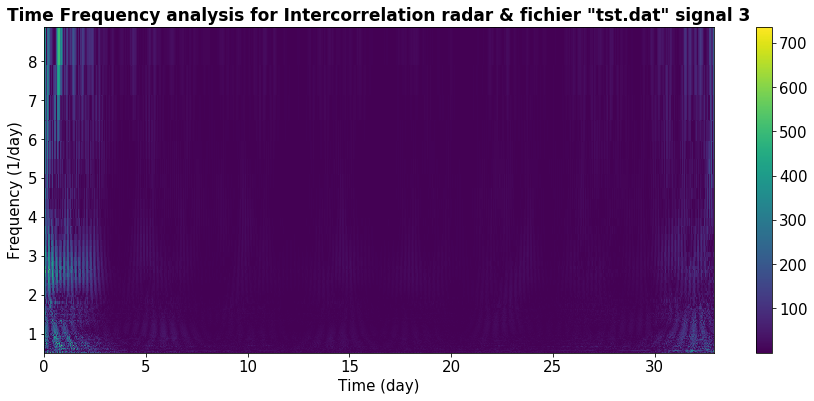

<Figure size 1080x432 with 0 Axes>

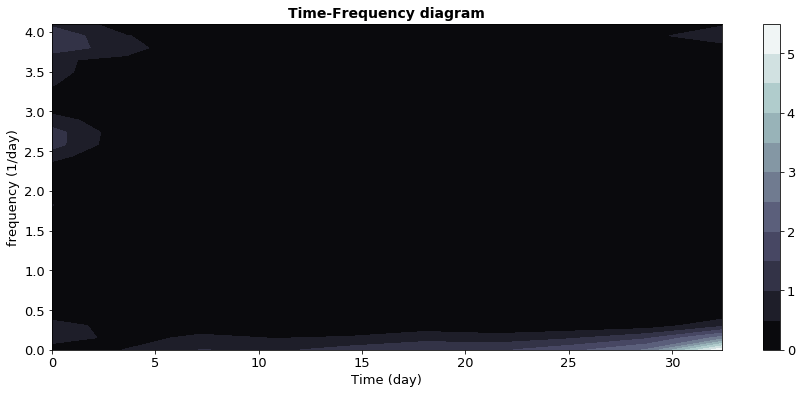

Most important frequencies : 
[10.15712251 23.69995252 35.54992879]


<Figure size 1080x432 with 0 Axes>

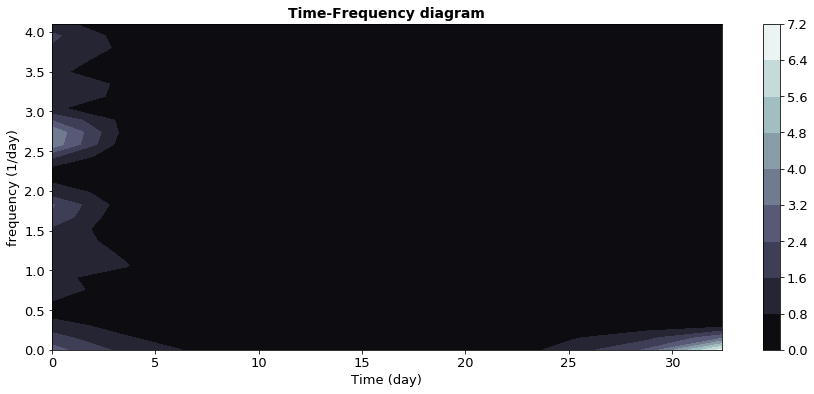

Most important frequencies : 
[14.21997151  0.93552444 35.54992879]


<Figure size 1080x432 with 0 Axes>

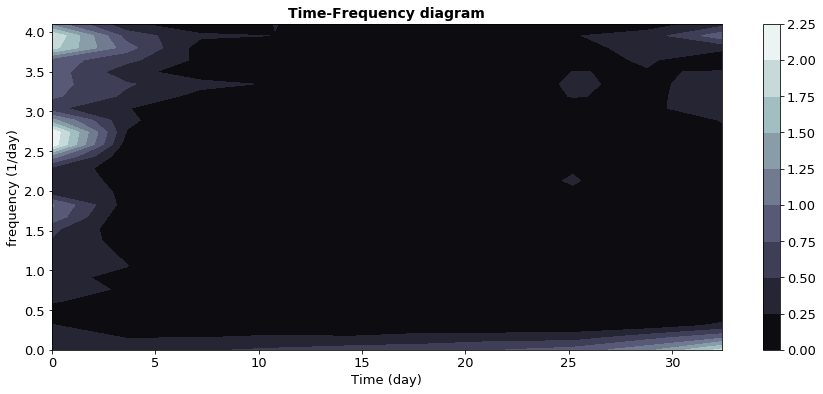

Most important frequencies : 
[10.15712251 23.69995252 35.54992879]


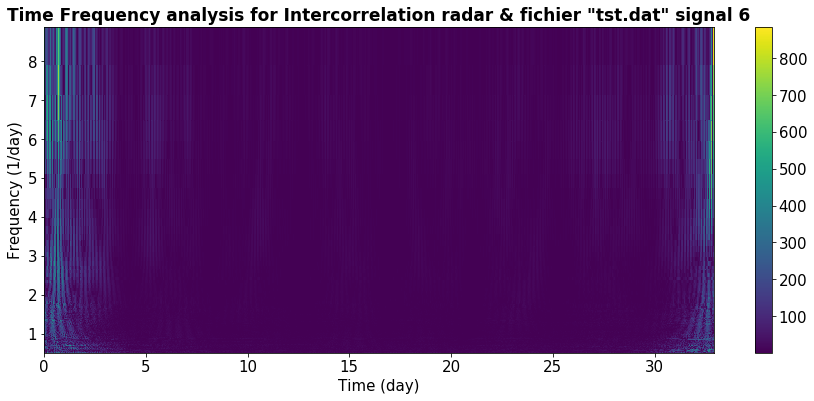

<Figure size 1080x432 with 0 Axes>

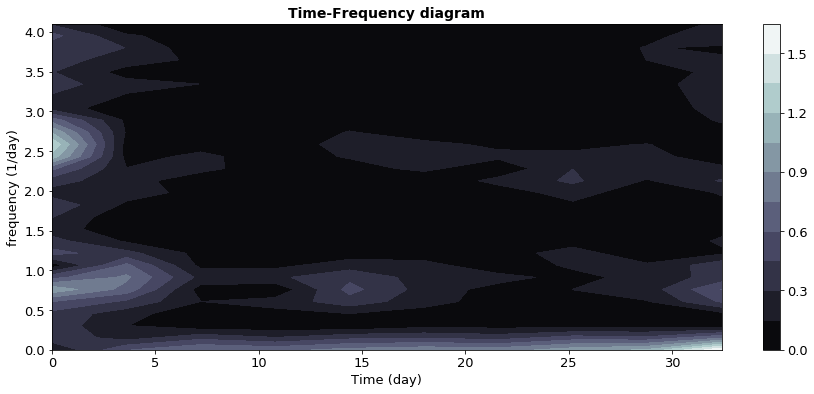

Most important frequencies : 
[ 0.77282454 11.84997626 23.69995252 35.54992879]


<Figure size 1080x432 with 0 Axes>

Most important frequencies : 
[ 0.64636234 11.84997626 35.54992879 23.69995252]


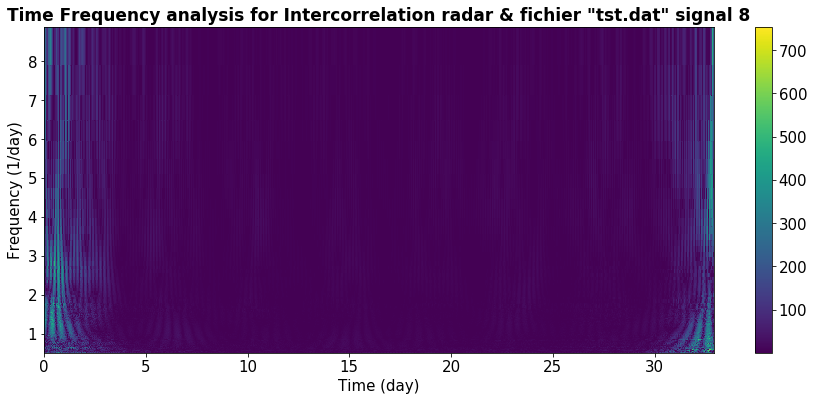

In [21]:
for i,j in enumerate(range(5, len(signaux))):
#for i in range(6, 7):
    Shumidite = ajusteur(signaux[j])
    SS = Signal(signal = Tab_IC[i], a=0, b=Sradar.b/2, nom = "Intercorrelation radar & " + Shumidite.nom)
    SS.analyse_temp_freq(10, zoom_petites_freq = 10)
    SS.analyse_temp_freq_ond(ond='morl', zoom_freq= 10, nb_freq_and_res = [10, 10], time_unit='day')